# Global Gaming Marketing Strategy

## Many of us have our favorite games, each for unique reasons. It could be the achievements we've unlocked, the items we've collected, the things we've built, an immersive series, or the friends and companions we've met along the way. However, just because a game is our favorite doesn't mean it’s everyone’s. Looking back, it's often easier to understand why certain games gain popularity. Our project's goal is to find patterns, analyze trends, and explore various visualizations to determine which variables best predict sales.   

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sp
import streamlit as st
import plotly_express as px

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('games.csv')

In [ ]:
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# columns names all lower case
df.columns = df.columns.str.lower()

#filter out rows where name is blank
df = df[df['name'].notna()]

#The year of release column does not follow the date time format so we convert to integer to have values we can work with
df['year_of_release'] = df['year_of_release'].replace([float('inf'), -float('inf')], float('nan'))
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

#ignore na value from rating column
df['rating'] = df['rating'].astype('str', errors='ignore')

In [ ]:
average_critic_score = df['critic_score'].mean()
sd_critic_score = df['critic_score'].std()

print("Average Critic Score:", average_critic_score)
print("Standard Deviation of Critic Score:", sd_critic_score)
print("")
#determine max value
max_critic = df['critic_score'].max()
print("Max Critic Score:", max_critic)

Average Critic Score: 68.96767850559173
Standard Deviation of Critic Score: 13.938164552843201

Max Critic Score: 98.0


#### If we were to change the missing values from the critic_socre column to the average it wouldn't effect the mean.  However changing about half of the values (8137 non-null) to the mean would drastically effect the distribution.  So would set missing values to 99 so it won't overlap with our valid values.  

In [ ]:
#check for value of 9.9
count_99 = (df['user_score'] == 9.9).sum()
display(f'There are {count_99} values already equal to 9.9')
#deal with tbd values
df['user_score'] = df['user_score'].replace('tbd', 9.9).astype(float)

'There are 0 values already equal to 9.9'

In [ ]:
#multiply the user_score by 10 so we can compare to critic_score
df['user_score'] = (df['user_score'] * 10)
#replace empty vallue in na column with "99"
df.fillna(99, inplace=True)

In [ ]:
# create column total sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# move new column following the columns it sums
df.insert(8, 'total_sales', df.pop('total_sales'))

In [ ]:
df['average_score'] = (df['critic_score'] + df['user_score']) / 2

In [ ]:
#only include games this century
df = df[df['year_of_release'] >= 2010]
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 5277 entries, 14 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   int32  
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   total_sales      5277 non-null   float64
 9   critic_score     5277 non-null   float64
 10  user_score       5277 non-null   float64
 11  rating           5277 non-null   object 
 12  average_score    5277 non-null   float64
dtypes: float64(8), int32(1), object(4)
memory usage: 556.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,average_score
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,21.82,61.0,63.0,E,62.0
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,82.0,M,89.5
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,81.0,M,89.0
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,15.13,99.0,99.0,nan,99.0
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,34.0,M,61.0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,99.0,99.0,nan,99.0
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,14.62,87.0,63.0,M,75.0
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,99.0,99.0,nan,99.0
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,53.0,M,68.0
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,13.68,83.0,48.0,M,65.5


### We performed several steps to clean and fix data issues. First, we converted column names to lowercase. We removed rows where the name column was blank. The Year of Release column only contained the year, not the date or time, so we converted it to an integer format. Next, we ignored any missing values in the rating column and created a new column to average user and critic scores. We created a new column totaling all sales. Finally, we consolidated all the information to focus on the most pertinent data from the last several years (2010-2016).

# Exploratory Data Analysis

In [ ]:
# group by platform and games release
games_per_platform = df['platform'].value_counts().reset_index()
games_per_platform.columns = ['platform', 'count']

# sort ascending
games_per_platform = games_per_platform.sort_values(by='count', ascending=True)
# create a bar graph
fig1 = px.bar(games_per_platform, x='platform', y='count', title='Games Released by Platform', labels={'platform': 'Platform', 'count': 'Games'}, color='count', color_continuous_scale='Blues')
fig1.update_traces(marker_line_color='black', marker_line_width=1.5)

fig1.show()

### We see many gaming systems releasing over 200 titles in the last several years, led by the PS3 and Xbox 360.

In [ ]:
# group by total sales and platform above 150
total_sales_by_platform = df.groupby('platform')['total_sales'].sum().reset_index()
total_sales_by_platform = total_sales_by_platform[total_sales_by_platform['total_sales'] > 150]
# sort in ascending 
total_sales_by_platform = total_sales_by_platform.sort_values(by='total_sales', ascending=True)
# create bar charts
fig2 = px.bar(total_sales_by_platform, x='platform', y='total_sales', title='Total Sales by Platform', labels={'platform': 'Platform', 'total_sales': 'Total Sales'}, color='total_sales', color_continuous_scale='Blues')

fig2.show()

### PlayStation and Xbox mark up a majority of the game sales across the globe. 

In [ ]:
# group by genre 
total_sales_by_genre = df.groupby('genre')['total_sales'].sum().reset_index()
total_sales_by_genre = total_sales_by_genre.sort_values(by='total_sales', ascending=True)

# filter for total sales 
total_sales_by_genre = total_sales_by_genre[total_sales_by_genre['total_sales'] > 150]

# plot
fig3 = px.bar(total_sales_by_genre, x='genre', y='total_sales', title='Total Sales by Genre', labels={'genre': 'Genre', 'total_sales': 'Total Sales'}, color='total_sales', color_continuous_scale='blues')

fig3.show()

### Overall Action games are purchased the most.  Followed by Shooter.  Sports and Role-Playing are about tied for third. 

In [ ]:
# group total sales by ratings
df_rating = df.groupby('rating')['total_sales'].sum().reset_index()
df_rating = df_rating.sort_values(by='total_sales', ascending=True)
# filter for total sales greater than 100
df_rating = df_rating[df_rating['total_sales'] > 150]
# create a bar chart
fig4 = px.bar(df_rating, x='rating', y='total_sales', title='Total Sales by Rating', labels={'rating': 'Rating', 'total_sales': 'Total Sales'}, color='total_sales', color_continuous_scale='blues')

fig4.show()

### Games rated Mature have the highest sales, followed by those rated E.  However the problem in using this data element is missing values of "nan" also account for a significant portion of the sales. 

In [ ]:
# filtered scores 99 or above and over 10 mil sales
filtered_df = df[(df['average_score'] < 99) & (df['total_sales'] > 1)]
# Group by name and calculate the average score
avg_score_by_name = filtered_df.groupby(['name', 'total_sales'])['average_score'].mean().reset_index()

# sort by average score and take the top 30           
avg_score_by_name = avg_score_by_name.nlargest(30, 'average_score')
avg_score_by_name = avg_score_by_name.sort_values(by='total_sales', ascending=True)

# Create a bar chart using Plotly Express
fig5 = px.bar(avg_score_by_name, x='name', y='total_sales', title='Top 30 Rated Games by Critics and Users, with Sales of at least 1Mil', labels={'name': '', 'total_sales': 'Total Sales'}, 
color='average_score', color_continuous_scale='teal')

# Show the plot
fig5.show()

### This chart contains a great deal of both quantitative and qualitative information. It showcases the top 30 games, each with at least 1 million in sales. We only see 22 game titles because some games have multiple instances across different platforms with high sales and reviews.

In [ ]:
# group by name and total sales
total_sales_by_name = df.groupby(['name', 'total_sales']).sum().reset_index()

# top 30 sales
top_30 = total_sales_by_name.nlargest(30, 'total_sales')
top_30 = top_30.sort_values(by='total_sales', ascending=True)

# plot
fig6 = px.bar(top_30, x='name', y='total_sales', title='Top 30 Games by Total Sales', labels={'name': '|', 'total_sales': 'Total Sales'}, color='total_sales', 
color_continuous_scale='teal')

fig6.show()

### Having the very highest reviews doesn't always translate into sales. However, we do see GTA V again just based on total sales. 

### After initially cleaning our data, we can start to see how certain variable influence a games popularity which hopefully translate to sales.

# Deep Dive

### We know that overall, the PS3 and Xbox 360 have the largest shares of total games salse. As we approach the end of 2016, are there any systems that are controlling a majority of the market?

In [ ]:
# filter data by platforms
ps_data = df[df['platform'].isin(['PSV', 'PS4', 'PS3'])]

# group by platform 
ps_per_year = ps_data.groupby(['platform', 'year_of_release']).size().reset_index(name='count')

# plot
fig10 = px.bar(ps_per_year, x='year_of_release', y='count', color='platform', barmode='group', title='PS3, PS4, and PSV Games Released by Year',
labels={'year_of_release': 'Year of Release', 'count': 'Games'}, color_discrete_map={'PSV': '#e6e6e6', 'PS4': '#FF0000', 'PS3': '#808080'})  
fig10.update_traces(marker_line_color='black', marker_line_width=2.5)

fig10.show()

### As we've seen already Playstation systems are one of the most popular platforms.  Approaching 2016 we see the declining popularity of PS3, PSV peaks in popularity in 2015, and finally the rise of PS4.  

In [ ]:
# filter data by platforms
ps_data = df[df['platform'].isin(['X360', 'XOne'])]

# group by platform a
ps_per_year = ps_data.groupby(['platform', 'year_of_release']).size().reset_index(name='count')

# plot
fig11 = px.bar(ps_per_year, x='year_of_release', y='count', color='platform', barmode='group',title='Xbox 360 and Xbox One Games Released by Year',
labels={'year_of_release': 'Year of Release', 'count': 'Games'},color_discrete_map={'X360': '#FF0000', 'XOne': '#e6e6e6'})  
fig11.update_traces(marker_line_color='black', marker_line_width=2.5)

fig11.show()

### Microsoft also sees declining popularity of it Xbox 360 system as Xbox One gains popularity in 2014. Gaming on Personal Computers seems to come and go with the highest year being 2011, then dropping to a low 2013, and then rising again above 50 games in 2016. 

In [ ]:
# filter data by platforms
ps_data = df[df['platform'].isin(['Wii', '3DS', 'WiiU'])]

# group by platform and year of release, and count
ps_per_year = ps_data.groupby(['platform', 'year_of_release']).size().reset_index(name='count')

#plot
fig12 = px.bar(ps_per_year, x='year_of_release', y='count', color='platform', barmode='group', title='3DS, Wii, and WiiU Games Released by Year',
labels={'year_of_release': 'Year of Release', 'count': 'Games'}, color_discrete_map={'WiiU': '#e6e6e6', '3DS': '#808080', 'Wii': '#FF0000'})  
fig12.update_traces(marker_line_color='black', marker_line_width=2.5)

fig12.show()

### Nitendo's WiiU comes out in 2012, but never matches the popularity of the 3DS. 

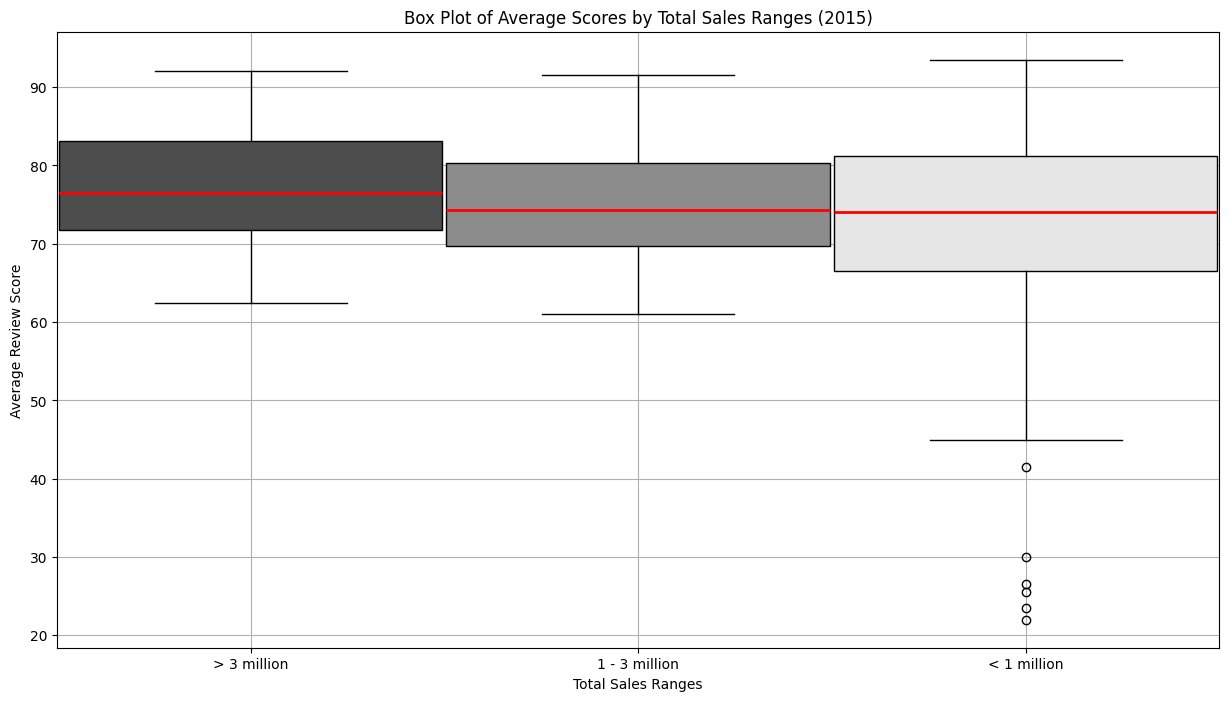

In [ ]:
# filter for year
df_2015 = df[df['year_of_release'] == 2015]

# gropu by total sales and filter out nan scores
high_sales_df = df_2015[df_2015['total_sales'] > 3]
filtered_scores_high = high_sales_df[high_sales_df['average_score'] < 99]['average_score']

mid_sales_df = df_2015[(df_2015['total_sales'] > 1) & (df_2015['total_sales'] <= 3)]
filtered_scores_mid = mid_sales_df[mid_sales_df['average_score'] < 99]['average_score']

low_sales_df = df_2015[df_2015['total_sales'] <= 1]
filtered_scores_low = low_sales_df[low_sales_df['average_score'] < 99]['average_score']

# plot
plt.figure(figsize=(15, 8))
plt.boxplot(filtered_scores_high, vert=True, patch_artist=True, positions=[1], widths=0.99, boxprops=dict(facecolor='#4d4d4d'), medianprops=dict(color='red', linewidth=2))
plt.boxplot(filtered_scores_mid, vert=True, patch_artist=True, positions=[2], widths=0.99, boxprops=dict(facecolor='#8c8c8c'), medianprops=dict(color='red', linewidth=2))
plt.boxplot(filtered_scores_low, vert=True, patch_artist=True, positions=[3], widths=0.99, boxprops=dict(facecolor='#e6e6e6'), medianprops=dict(color='red', linewidth=2))

plt.title('Box Plot of Average Scores by Total Sales Ranges (2015)')
plt.ylabel('Average Review Score')
plt.xlabel('Total Sales Ranges')
plt.xticks([1, 2, 3], ['> 3 million', '1 - 3 million', '< 1 million'])
plt.grid(True)

plt.show()

### In the above box plot, we see there's an upper limit to eliminate many of the games that sell less than a million globally, while maintaining some of the top-selling titles in the mid to high 70s.

### Now let’s see if we can start to apply what we’ve learned to drill down on the characteristics that correlate to sales.

In [ ]:
# filter for year 2015
df_2015 = df[df['year_of_release'] == 2015]

# filter for genre
df_2015 = df_2015[df_2015['genre'].isin(['Shooter', 'Action', 'Sports', 'Role-Playing'])]

# Working with sample in Excel found filtering both user and critic score yeilded better results than the average score. 
df_2015 = df_2015[(df_2015['critic_score'] > 80) & (df_2015['critic_score'] < 99)]
df_2015 = df_2015[(df_2015['user_score'] > 78) & (df_2015['user_score'] < 99)]
#df_2015 = df_2015[(df_2015['average_score'] >= 83) & (df_2015['critic_score'] < 99)]

#display(df_2015.head(20))

In [ ]:
fig13 = px.bar(df_2015, x='total_sales', y='name', orientation='h', title='Predicted Top sellers 2015 (Showing Actual Results)', labels={'total_sales': 'Total Sales (in millions)', 'name': ''}, 
color='total_sales', color_continuous_scale='redor')

fig13.update_layout(showlegend=False, margin=dict(l=250))
fig13.show()

##### *One minor tweak to our calculation was filtering on both Critic Scores and User Scores. We found we obtained slightly better results than using the average of both. 
### The chart above shows that with our filters in place for all sales in 2015, our filters predicted game sales close to or above 1 million.

In [ ]:
# filter for year 2015
df_2015 = df[df['year_of_release'] <= 2015]

# filter for genre
df_2015 = df_2015[df_2015['genre'].isin(['Shooter', 'Action', 'Sports', 'Role-Playing'])]

# filter for average_score 
df_2015 = df_2015[(df_2015['critic_score'] > 80) & (df_2015['critic_score'] < 99)]
df_2015 = df_2015[(df_2015['user_score'] > 78) & (df_2015['user_score'] < 99)]
#df_2015 = df_2015[(df_2015['average_score'] >= 83) & (df_2015['critic_score'] < 99)]

#display(df_2015.head(20))

In [ ]:
# Create a new column to classify total sales
df_2015['sales_group'] = df_2015['total_sales'].apply(lambda x: 'Greater than or equal to 1' if x > 1 else 'Less than 1')

# Plot
fig14 = px.bar(df_2015, x='platform', y='total_sales', color='sales_group', barmode='group', title='Total Sales, above and below 1 Million, Grouped by Platform and Total Sales (2010-2015)',
labels={'platform': 'Platform', 'total_sales': 'Total Sales (in millions)', 'sales_group': 'Sales Group'}, color_discrete_map={'Greater than or equal to 1': '#FF0000', 'Less than 1': '#808080'})

fig14.update_layout(xaxis={'categoryorder':'total descending'}, yaxis=dict(range=[0, 20]))
#fig14.update_traces(marker_line_color='black', marker_line_width=2.5)

fig14.show()

### To improve visibility, we limit the y-axis to 20. The chart above now clearly shows a difference in platforms when it comes to the ratio of total sales above and below 1 million. Xbox One, along with PS4, 3DS, Xbox 360, and PS3, have the highest percentage of total sales above 1 million.

In [ ]:
# filter for year_of_release equals 2016
df_2016 = df[df['year_of_release'] == 2016]

# filter for genre
df_2016 = df_2016[df_2016['genre'].isin(['Shooter', 'Action', 'Sports', 'Role-Playing'])]

# filter for average_score
df_2016 = df_2016[(df_2016['critic_score'] > 80) & (df_2016['critic_score'] < 99)]
df_2016 = df_2016[(df_2016['user_score'] > 78) & (df_2016['user_score'] < 99)]
#df_2016 = df_2016[(df_2016['average_score'] >= 83) & (df_2016['average_score'] < 99)]

# filter for platform
df_2016 = df_2016[df_2016['platform'].isin(['PS3', 'PS4', 'X360', 'XOne', '3DS'])]


In [ ]:
fig15 = px.bar(df_2016, x='total_sales', y='name', orientation='h', title='Predicted Top sellers in 2016', labels={'total_sales': 'Total Sales (in millions)', 'name': ''}, 
color='total_sales', color_continuous_scale='redor')

fig15.update_layout(showlegend=False, margin=dict(l=200))
fig15.show()

### Taking what we've learned so far from genre, user and critic scores, and platforms, these are the most likely games of 2016 to produce sales greater than 1 million.

# Regional Differences for Sales

In [ ]:
#group sales each region by platform
grouped_df = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

display(grouped_df)

,platform,na_sales,eu_sales,jp_sales,other_sales
0,3DS,82.65,61.27,100.62,13.27
1,DS,59.66,28.06,27.90,8.13
2,PC,39.07,68.82,0.00,14.07
3,PS2,2.32,1.67,0.80,1.30
4,PS3,229.25,213.60,59.26,85.63
5,PS4,108.74,141.09,15.96,48.35
6,PSP,9.65,7.59,42.20,4.61
7,PSV,12.47,13.07,21.84,6.43
8,Wii,121.20,65.91,17.75,18.11
9,WiiU,38.10,25.13,13.01,5.95


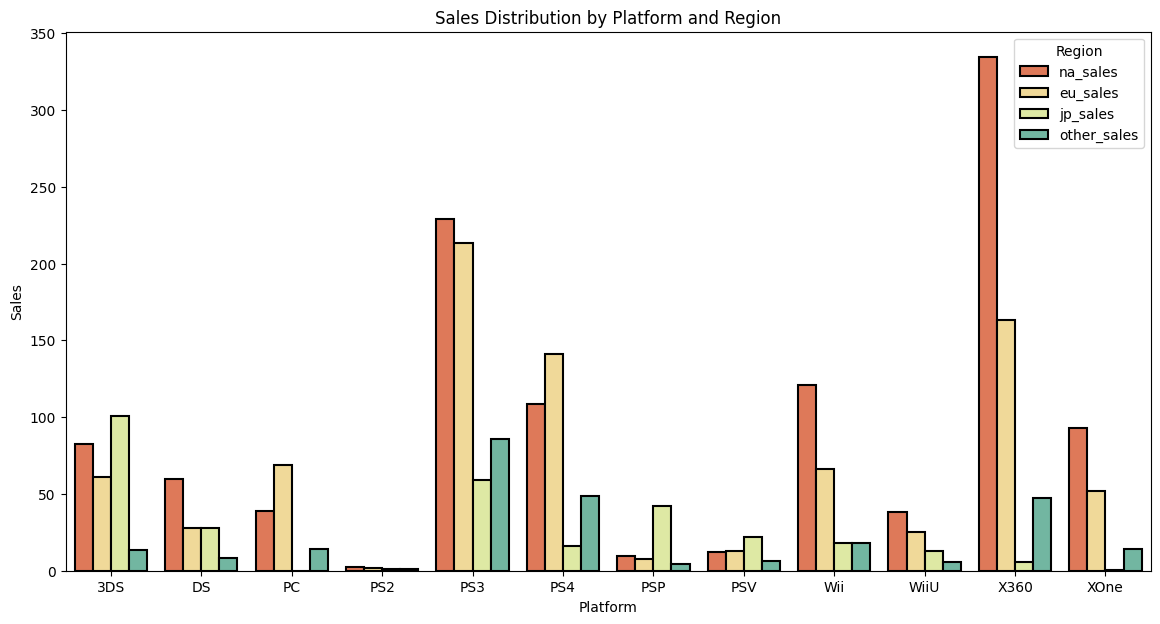

In [ ]:
# melt dataframe
melted_df = grouped_df.melt(id_vars='platform', value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], var_name='Sales Region', value_name='Sales')

# color palette
palette = sns.color_palette("Spectral", n_colors=melted_df['Sales Region'].nunique())

# plot 
plt.figure(figsize=(14, 7))
bars = sns.barplot(data=melted_df, x='platform', y='Sales', hue='Sales Region', palette=palette)

for bar in bars.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

plt.title('Sales Distribution by Platform and Region')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.legend(title='Region')            

### When comparing game sales across different regions by platform, several differences emerge. The Xbox 360 is the most popular system in North America, and ranks second or third in Europe and other regions. The PS3 leads in Europe and other regions, and is second in North America and Japan. However, the 3DS has the largest customer base in Japan.

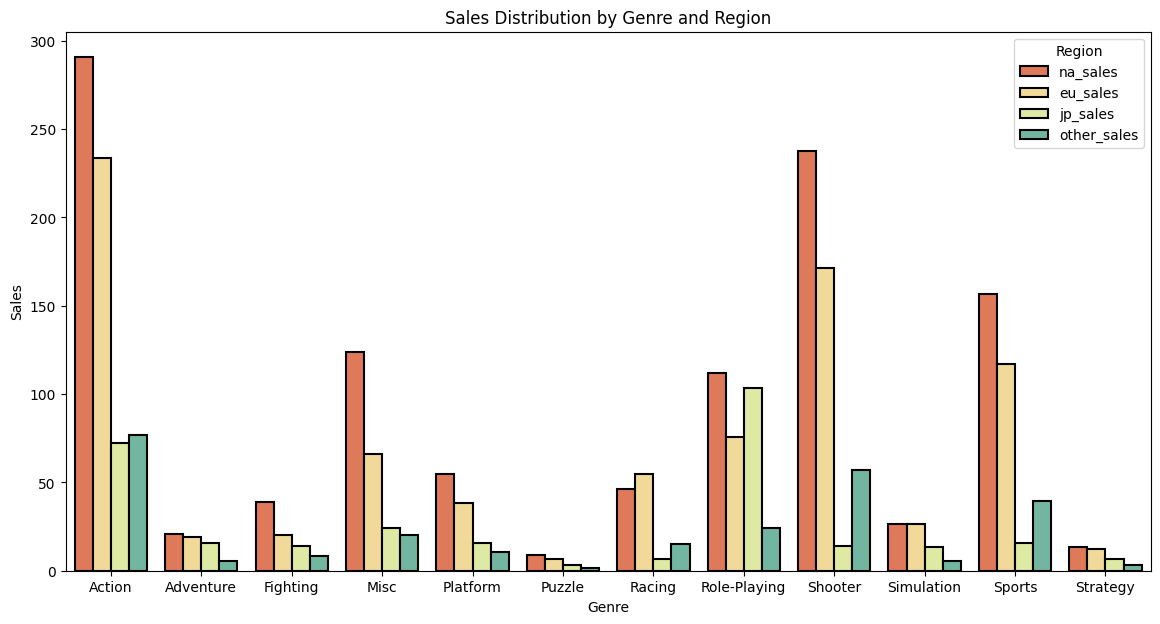

In [ ]:
# group regional sales by platform 
grouped_df_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# melt dataframe
melted_df_genre = grouped_df_genre.melt(id_vars='genre', value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], var_name='Sales Region', value_name='Sales')

# color palette
palette_genre = sns.color_palette("Spectral", n_colors=melted_df_genre['Sales Region'].nunique())

# plot
plt.figure(figsize=(14, 7))
bars_genre = sns.barplot(data=melted_df_genre, x='genre', y='Sales', hue='Sales Region', palette=palette_genre)

for bar in bars_genre.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

plt.title('Sales Distribution by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.show()


### Very similar results in North America, Europe, and other regions when we group by genre. Action, Shooter, and Sports are their top three. In Japan however Role-Playing is the most popular genre, followed by Action.

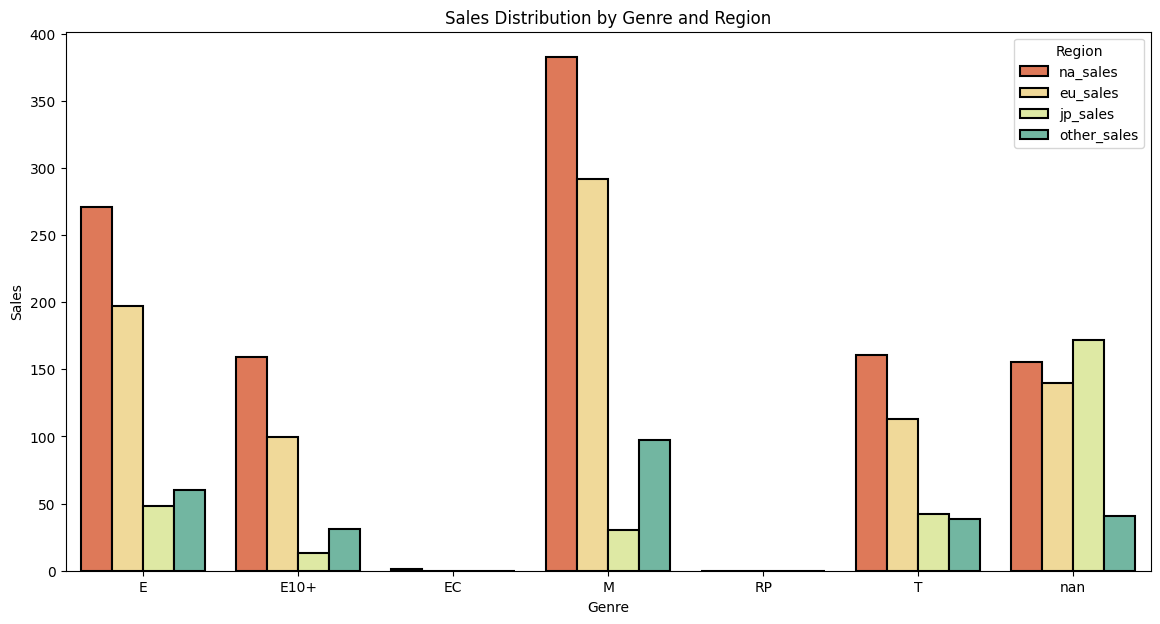

In [ ]:
# group regional sales by genre
grouped_df_rating = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# melt dataframe
melted_df_rating = grouped_df_rating.melt(id_vars='rating', value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], var_name='Sales Region', value_name='Sales')

# color palette
palette_genre = sns.color_palette("Spectral", n_colors=melted_df_rating['Sales Region'].nunique())

# plot
plt.figure(figsize=(14, 7))
bars_genre = sns.barplot(data=melted_df_rating, x='rating', y='Sales', hue='Sales Region', palette=palette_genre)

for bar in bars_genre.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

plt.title('Sales Distribution by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.show()

### We see another similar pattern: North America, Europe, and other regions follow the ratings of Mature and then Everyone. In Japan we are mostly missing any rating for game sales.

# Testing Hypothesis for different User Ratings

###  For determining the  significance level of our tests we decided on an alpha value of .05.  Given the quality and variablility of the data we determined there to be a moderate risk of either a Type I or Type II error.

In [ ]:
# xbox One vs PC user ratings 
xone_user_scores = df[df['platform'] == 'XOne']['user_score']
pc_user_scores = df[df['platform'] == 'PC']['user_score']
# average each
xone_grouped = xone_user_scores.mean()
pc_grouped = pc_user_scores.mean()   

# calculate the t-test
results = sp.ttest_ind(xone_user_scores, pc_user_scores)
# set alpha level
alpha = 0.05

# print the results
print('alpha =', alpha)
print('p-value:', results.pvalue)
print('')
print('Null Hypothesis (H₀): Average user score of XOne = Average user score of PC')
print('Alternative Hypothesis (H₁): Average user score of XOne ≠ Average user score of PC')
print('')

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant difference in the average user scores between XOne and PC.")
else:
    print("We can't reject the null hypothesis.")
    print("There is no significant difference in the average user scores between XOne and PC.")

alpha = 0.05
p-value: 0.32229930615472446

Null Hypothesis (H₀): Average user score of XOne = Average user score of PC
Alternative Hypothesis (H₁): Average user score of XOne ≠ Average user score of PC

We can't reject the null hypothesis.
There is no significant difference in the average user scores between XOne and PC.


### There is a clear correlation between user reviews on Xbox One and PC.  This is not all that surprising given we aren't comparing apples and oranges (iphone and andriod or Macs and PCs), but Mircosoft Xbox and Microsoft PC gaming reviews. 

In [ ]:
# Group user scores by Action and Sport genre to compare
action_user_scores = df[df['genre'] == 'Action']['user_score']
sports_user_scores = df[df['genre'] == 'Sports']['user_score']

# calculate the t-test 
results = sp.ttest_ind(action_user_scores, sports_user_scores)

# set alpha
alpha = 0.05

# print the results
print('alpha =', alpha)
print('p-value:', results.pvalue)
print('')
print('Null Hypothesis (H₀): Average user score of Action = Average user score of Sports')
print('Alternative Hypothesis (H₁): Average user score of Action ≠ Average user score of Sports')
print('')


if results.pvalue < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant difference in the average user scores between Action and Sports genres.")
else:
    print("We can't reject the null hypothesis.")
    print("There is no significant difference in the average user scores between Action and Sports genres.")

alpha = 0.05
p-value: 8.754288147862288e-09

Null Hypothesis (H₀): Average user score of Action = Average user score of Sports
Alternative Hypothesis (H₁): Average user score of Action ≠ Average user score of Sports

We reject the null hypothesis.
There is a significant difference in the average user scores between Action and Sports genres.


###  Comparing two different catagories of games is terms of user reviews couldn't be more different.  Using our analogy above, it's more like comparing fruit and vegitables, and so we find significantly different results. 

## The greatest challenge in this project was working with both an abundance and a scarcity of information. Some data was too old to be relevant for predicting future sales, while other data had gaps that limited its usability. Despite this, we were able to learn a lot about what drives the popularity of games and their corresponding gaming systems around the world. This knowledge can be applied to maintain the necessary supply to meet customer demand, maximizing our market space by getting the right products to the right customers. Ultimately, this will increase revenue going into the future.